<h3>Task 2: Prediction using Unsupervised ML</h3>
<h4>By Jie Guang</h4>
<p>

<a href="https://bit.ly/3kXTdox">Link to Data</a>

1. Predict <ins>optimum number of clusters</ins>, <ins>Based on first 2 Columns</ins> (Assumed, as question did not state based on what information.)
2. Represent clusters visually

Use K-means cluster

</p>

<h6>
Task Submission:

1. Host on Public Git Repo
2. Record Code in video, post on youtube
3. Share link of code & video, on LinkedIn Profile
4. Submit LinkedIn link in task submission form

</h6>


In [149]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [150]:
# Import Data
irisData = pd.read_csv("TSF_Data2.csv")
print(irisData.head())
irisData.dtypes

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [151]:
# Assume it is clustering based on first 2 columns

# irisData[["SepalLengthCm", "SepalWidthCm"]].values

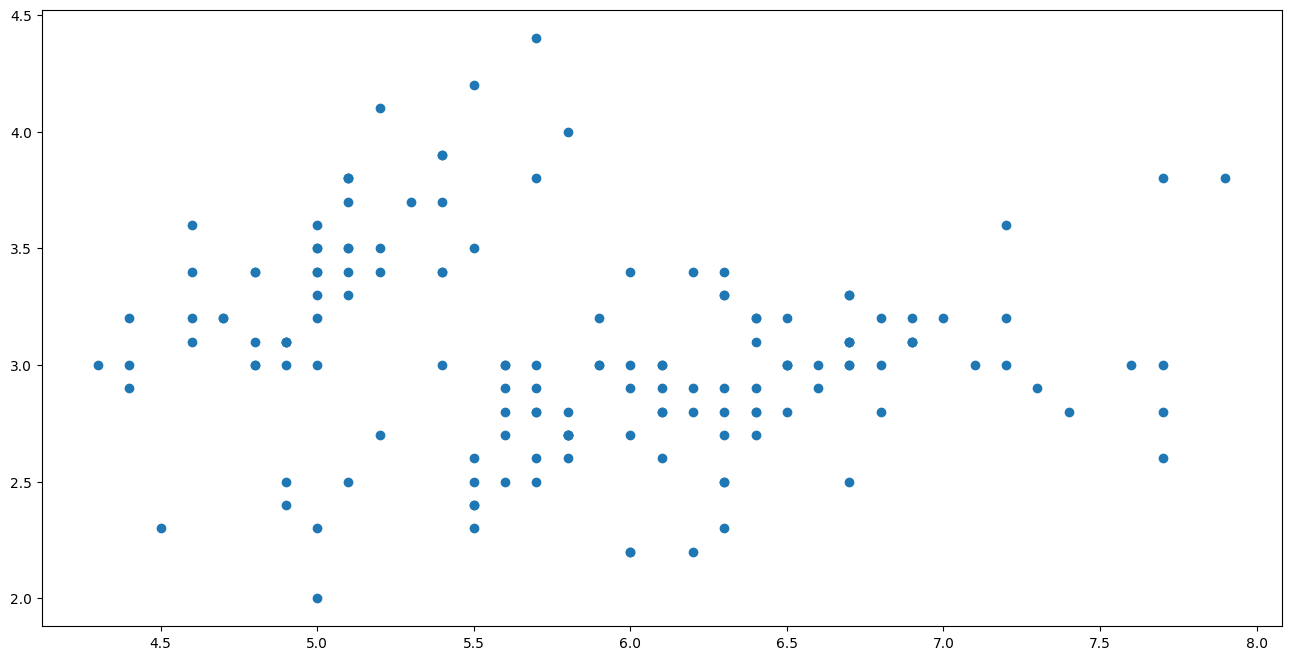

In [152]:
# Plot iris data for first 2 columns
f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = irisData["SepalLengthCm"].values, y = irisData["SepalWidthCm"].values)
# plt.scatter(x = irisData["PetalLengthCm"].values, y = irisData["PetalWidthCm"].values)
plt.show()

In [153]:
# Import KMeans
from sklearn.cluster import KMeans

In [154]:
# Fit into kmeans model and find the Within Cluster Sum of Squares from 1 cluster to 10 clusters
clusterDF = pd.DataFrame(irisData[["SepalLengthCm", "SepalWidthCm"]])

minCluster = 1
maxCluster = 10

# Find WCSS
wcss = []
for i in range(minCluster, maxCluster + 1):
    kmeans = KMeans(n_clusters = i, n_init = 10)
    kmeans.fit(clusterDF)
    wcss.append(kmeans.inertia_)
# wcss

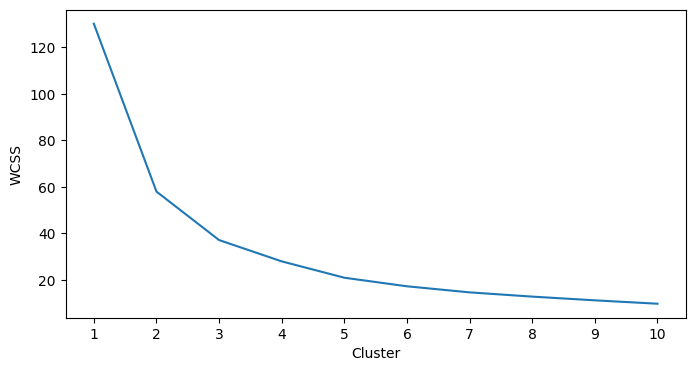

In [155]:
# Plot WCSS vs Clusters to get elbow plot
f, axes = plt.subplots(1, 1, figsize=(8,4))
plt.plot(range(minCluster, maxCluster + 1), wcss)
plt.xlabel('Cluster')
plt.ylabel('WCSS')
plt.xticks(range(1,11))
plt.show()

# Best one to take would be 3

In [156]:
# Use optimal cluster number, 3
# Use Kmeans++ as the algo (Better clustering)
kmeans = KMeans(n_clusters = 3, init = "k-means++", n_init = 30)
kmeans.fit(clusterDF)
# kmeans.cluster_centers_

print("\t\t\t\t\tSepalLengthCm\tSepalWidthCm")
# Find cluster centers
for i, avg in enumerate(kmeans.cluster_centers_):
    print(f"Cluster Number: {i}", end = "\t")
    print(f"Cluster Coords: {avg}")

print(f"WCSS: {kmeans.inertia_}")

					SepalLengthCm	SepalWidthCm
Cluster Number: 0	Cluster Coords: [5.77358491 2.69245283]
Cluster Number: 1	Cluster Coords: [6.81276596 3.07446809]
Cluster Number: 2	Cluster Coords: [5.006 3.418]
WCSS: 37.12370212765958


In [157]:
# Categorize Cluster
categories = kmeans.predict(clusterDF)
# print(categories)
labelledDF = clusterDF.copy()
labelledDF["Cluster"] = pd.Categorical(categories) 
# labelledDF

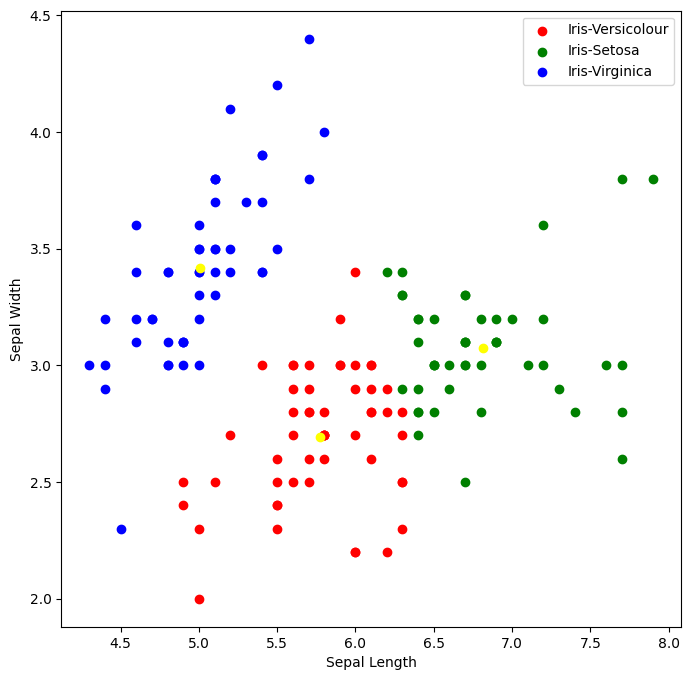

In [158]:
# Plot with colour code from each cluster
# Observe clusters and assign names of iris type
f, axes = plt.subplots(1, 1, figsize=(8,8))
plt.scatter(x = labelledDF.loc[labelledDF["Cluster"] == 0, "SepalLengthCm"], 
            y = labelledDF.loc[labelledDF["Cluster"] == 0, "SepalWidthCm"], c = "red", label = "Iris-Versicolour")

plt.scatter(x = labelledDF.loc[labelledDF["Cluster"] == 1, "SepalLengthCm"], 
            y = labelledDF.loc[labelledDF["Cluster"] == 1, "SepalWidthCm"], c = "green", label = "Iris-Setosa")

plt.scatter(x = labelledDF.loc[labelledDF["Cluster"] == 2, "SepalLengthCm"], 
            y = labelledDF.loc[labelledDF["Cluster"] == 2, "SepalWidthCm"], c = "blue", label = "Iris-Virginica")
# Visualize center points too
for i in kmeans.cluster_centers_:
    plt.scatter(x = i[0], y = i[1], c = "yellow")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

plt.show()


